# (Ford GoBike System Data)
## by (Abdulrahman Almajhad)

## Preliminary Wrangling

**Ford GoBike** (Bay Wheels previously) is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.

Our Ford GoBike dataset will be in 2019/12, which contains 150102 rows and 14 columns.

_______________________________________________________________________________________________________________________________

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv('201912-baywheels-tripdata.csv')
df.head()

C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,37.772000,-122.389970,349.0,Howard St at Mary St,37.781010,-122.405666,12085,Customer,NaN
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,410.0,Illinois St at Cesar Chavez St,37.750200,-122.386567,9477,Customer,NaN
2,8164,2019-12-31 23:50:04.8770,2020-01-01 02:06:09.4140,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,10420,Customer,NaN
3,8163,2019-12-31 23:49:21.4000,2020-01-01 02:05:24.6670,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2065,Customer,NaN
4,6847,2019-12-31 22:51:05.6850,2020-01-01 00:45:13.4860,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,10219,Customer,NaN


In [3]:
df.shape

(150102, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             150102 non-null  int64  
 1   start_time               150102 non-null  object 
 2   end_time                 150102 non-null  object 
 3   start_station_id         129083 non-null  float64
 4   start_station_name       129087 non-null  object 
 5   start_station_latitude   150102 non-null  float64
 6   start_station_longitude  150102 non-null  float64
 7   end_station_id           128755 non-null  float64
 8   end_station_name         128757 non-null  object 
 9   end_station_latitude     150102 non-null  float64
 10  end_station_longitude    150102 non-null  float64
 11  bike_id                  150102 non-null  int64  
 12  user_type                150102 non-null  object 
 13  rental_access_method     27681 non-null   object 
dtypes: f

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,150102.000000,129083.000000,150102.000000,150102.000000,128755.000000,150102.000000,150102.000000,150102.000000
mean,790.649752,166.216884,37.734527,-122.324810,157.234841,37.729180,-122.305736,98479.011719
std,2925.944647,139.504738,0.149011,0.167988,137.800047,0.480472,1.490201,217369.156650
min,60.000000,3.000000,37.268049,-122.513816,3.000000,0.000000,-122.513824,12.000000
25%,359.000000,52.000000,37.764802,-122.415674,38.000000,37.765026,-122.411726,9496.000000
50%,570.000000,116.000000,37.776664,-122.398279,109.000000,37.777053,-122.397086,11025.000000
75%,886.000000,266.000000,37.792251,-122.275698,252.000000,37.794130,-122.279352,12727.000000
max,912110.000000,498.000000,37.880222,-121.813425,498.000000,37.880222,0.000000,999941.000000


In [6]:
# check for null values
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            21019
start_station_name          21015
start_station_latitude          0
start_station_longitude         0
end_station_id              21347
end_station_name            21345
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       122421
dtype: int64

In [7]:
# drop rental_access_method column (unnecessary for our analysis)
df.drop(['rental_access_method'], axis = 1, inplace=True)

In [8]:
# drop all rows with null values
df.dropna(inplace = True)

In [9]:
# check
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 149779
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             125634 non-null  int64  
 1   start_time               125634 non-null  object 
 2   end_time                 125634 non-null  object 
 3   start_station_id         125634 non-null  float64
 4   start_station_name       125634 non-null  object 
 5   start_station_latitude   125634 non-null  float64
 6   start_station_longitude  125634 non-null  float64
 7   end_station_id           125634 non-null  float64
 8   end_station_name         125634 non-null  object 
 9   end_station_latitude     125634 non-null  float64
 10  end_station_longitude    125634 non-null  float64
 11  bike_id                  125634 non-null  int64  
 12  user_type                125634 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 13.4+ MB


In [11]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
7669,195,2019-12-27 15:51:21.9460,2019-12-27 15:54:37.4820,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,3488,Customer
8937,159,2019-12-26 21:10:23.1650,2019-12-26 21:13:02.9320,262.0,West St at University Ave,37.869967,-122.286533,262.0,West St at University Ave,37.869967,-122.286533,1168,Customer
75658,797,2019-12-10 12:40:45.3180,2019-12-10 12:54:03.1850,86.0,Market St at Dolores St,37.769305,-122.426826,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,9907,Customer
22342,741,2019-12-20 09:19:06.0690,2019-12-20 09:31:27.1740,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1297,Customer
95874,632,2019-12-06 08:41:51.2590,2019-12-06 08:52:24.0440,58.0,Market St at 10th St,37.776619,-122.417385,66.0,3rd St at Townsend St,37.778742,-122.392741,10237,Subscriber


In [12]:
# convert all invalid data types to valid data type

# From string to integer
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)
# From string to date
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# From object to category
df['user_type'] = df['user_type'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 149779
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             125634 non-null  int64         
 1   start_time               125634 non-null  datetime64[ns]
 2   end_time                 125634 non-null  datetime64[ns]
 3   start_station_id         125634 non-null  int32         
 4   start_station_name       125634 non-null  object        
 5   start_station_latitude   125634 non-null  float64       
 6   start_station_longitude  125634 non-null  float64       
 7   end_station_id           125634 non-null  int32         
 8   end_station_name         125634 non-null  object        
 9   end_station_latitude     125634 non-null  float64       
 10  end_station_longitude    125634 non-null  float64       
 11  bike_id                  125634 non-null  int64         
 12  user_type       

In [14]:
df['user_type'].value_counts()

Customer      68972
Subscriber    56662
Name: user_type, dtype: int64

In [15]:
df['start_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)    3106
Market St at 10th St                              2402
Berry St at 4th St                                2299
Howard St at Beale St                             1863
Steuart St at Market St                           1671
                                                  ... 
1st St at Younger Ave                                6
George St at 1st St                                  5
Kerley Dr at Rosemary St                             5
Mercado Way at Sierra Rd                             3
21st Ave at International Blvd                       2
Name: start_station_name, Length: 420, dtype: int64

In [16]:
df['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)      4811
Montgomery St BART Station (Market St at 2nd St)    2719
Berry St at 4th St                                  2385
Market St at 10th St                                2308
Powell St BART Station (Market St at 4th St)        2217
                                                    ... 
21st Ave at International Blvd                         4
Auzerais Ave at Lincoln Ave                            4
Kerley Dr at Rosemary St                               4
Mercado Way at Sierra Rd                               3
SF Test Station                                        1
Name: end_station_name, Length: 422, dtype: int64

In [17]:
df.duplicated().sum()

0

#### *Let's add some columns to make a good analysis!*

In [18]:
# extract day of month
df['day_of_month'] = df['start_time'].dt.day
# extract day of week
df['day_of_week'] = df['start_time'].dt.strftime('%a')
# extract hour of day
df['hour_of_day'] = df['start_time'].dt.hour

# calc duration minutes
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(float).round(2)

In [19]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,day_of_month,day_of_week,hour_of_day,duration_min
114998,794,2019-12-03 08:45:46.502,2019-12-03 08:59:01.443,285,Webster St at O'Farrell St,37.783521,-122.431158,349,Howard St at Mary St,37.781010,-122.405666,12994,Customer,3,Tue,8,13.23
9053,1000,2019-12-26 18:50:32.161,2019-12-26 19:07:12.883,59,S Van Ness Ave at Market St,37.774814,-122.418954,127,Valencia St at 21st St,37.756708,-122.421025,9488,Customer,26,Thu,18,16.67
31472,441,2019-12-18 15:57:20.244,2019-12-18 16:04:41.609,6,The Embarcadero at Sansome St,37.804770,-122.403234,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,9563,Customer,18,Wed,15,7.35
64118,475,2019-12-12 11:47:56.309,2019-12-12 11:55:52.288,182,19th Street BART Station,37.809369,-122.267951,187,Jack London Square,37.796248,-122.279352,473,Customer,12,Thu,11,7.92
99827,758,2019-12-05 17:05:34.149,2019-12-05 17:18:13.045,22,Howard St at Beale St,37.789756,-122.394643,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,12624,Subscriber,5,Thu,17,12.63
103029,1431,2019-12-05 08:27:53.069,2019-12-05 08:51:44.730,156,Stanford Ave at Hollis St,37.838443,-122.288665,246,Berkeley Civic Center,37.869060,-122.270556,12247,Subscriber,5,Thu,8,23.85
80515,1299,2019-12-09 18:15:00.736,2019-12-09 18:36:40.256,23,The Embarcadero at Steuart St,37.791464,-122.391034,376,Illinois St at 20th St,37.760458,-122.387540,12726,Customer,9,Mon,18,21.65
25710,207,2019-12-19 16:57:14.763,2019-12-19 17:00:42.505,247,Fulton St at Bancroft Way,37.867789,-122.265896,266,Parker St at Fulton St,37.862464,-122.264791,3178,Subscriber,19,Thu,16,3.45
18788,450,2019-12-20 21:05:59.064,2019-12-20 21:13:29.842,92,Mission Bay Kids Park,37.772301,-122.393028,130,22nd St Caltrain Station,37.757704,-122.391885,9860,Customer,20,Fri,21,7.50
10915,1213,2019-12-25 11:02:30.914,2019-12-25 11:22:44.862,251,California St at University Ave,37.870555,-122.279720,157,65th St at Hollis St,37.846784,-122.291376,731,Customer,25,Wed,11,20.22


In [20]:
df['day_of_month'].value_counts()

5     7295
9     7145
16    6926
17    6771
10    6746
3     6483
13    6477
12    6404
19    6029
6     5924
4     5831
11    5574
20    5372
2     4993
18    4468
14    3404
15    3326
8     3249
23    2844
30    2714
31    2510
21    2454
7     2107
27    2103
26    1697
28    1617
22    1417
24    1369
1     1008
29     704
25     673
Name: day_of_month, dtype: int64

In [21]:
df['day_of_week'].value_counts()

Mon    24622
Tue    23879
Thu    21425
Fri    19876
Wed    16546
Sun     9704
Sat     9582
Name: day_of_week, dtype: int64

In [22]:
df['hour_of_day'].value_counts()

8     15475
17    13967
9     12335
16    10141
18     9998
7      7185
15     6483
10     6155
19     6028
12     5620
11     5564
13     5454
14     5389
20     3871
21     2788
6      2697
22     2293
23     1395
0       835
5       762
1       524
2       323
4       216
3       136
Name: hour_of_day, dtype: int64

In [23]:
# fianl check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 149779
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             125634 non-null  int64         
 1   start_time               125634 non-null  datetime64[ns]
 2   end_time                 125634 non-null  datetime64[ns]
 3   start_station_id         125634 non-null  int32         
 4   start_station_name       125634 non-null  object        
 5   start_station_latitude   125634 non-null  float64       
 6   start_station_longitude  125634 non-null  float64       
 7   end_station_id           125634 non-null  int32         
 8   end_station_name         125634 non-null  object        
 9   end_station_latitude     125634 non-null  float64       
 10  end_station_longitude    125634 non-null  float64       
 11  bike_id                  125634 non-null  int64         
 12  user_type       

In [24]:
# final check
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,day_of_month,day_of_week,hour_of_day,duration_min
43717,901,2019-12-16 15:33:39.277,2019-12-16 15:48:41.202,160,West Oakland BART Station,37.805318,-122.294837,148,Horton St at 40th St,37.829705,-122.287610,3232,Customer,16,Mon,15,15.02
99803,794,2019-12-05 17:06:14.426,2019-12-05 17:19:28.765,23,The Embarcadero at Steuart St,37.791464,-122.391034,90,Townsend St at 7th St,37.771058,-122.402717,11419,Subscriber,5,Thu,17,13.23
3128,3567,2019-12-30 16:02:38.524,2019-12-30 17:02:06.341,462,Cruise Terminal at Pier 27,37.804223,-122.401643,371,Lombard St at Columbus Ave,37.802746,-122.413579,11211,Customer,30,Mon,16,59.45
52999,1124,2019-12-14 12:19:27.782,2019-12-14 12:38:12.210,323,Broadway at Kearny,37.798014,-122.405950,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,12493,Customer,14,Sat,12,18.73
67424,853,2019-12-11 19:34:51.211,2019-12-11 19:49:04.328,61,Howard St at 8th St,37.776513,-122.411306,133,Valencia St at 22nd St,37.755213,-122.420975,11174,Customer,11,Wed,19,14.22
60923,1298,2019-12-12 21:03:11.161,2019-12-12 21:24:49.348,127,Valencia St at 21st St,37.756708,-122.421025,359,Williams Ave at Apollo St,37.730168,-122.398963,10173,Customer,12,Thu,21,21.63
79632,691,2019-12-09 20:13:14.744,2019-12-09 20:24:46.489,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,66,3rd St at Townsend St,37.778742,-122.392741,10996,Subscriber,9,Mon,20,11.52
109206,316,2019-12-04 08:31:41.943,2019-12-04 08:36:58.652,92,Mission Bay Kids Park,37.772301,-122.393028,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,13036,Subscriber,4,Wed,8,5.27
3052,4360,2019-12-30 16:06:31.444,2019-12-30 17:19:11.477,441,Chestnut St at Van Ness Ave,37.802288,-122.424509,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,10880,Customer,30,Mon,16,72.67
118442,122,2019-12-02 17:10:32.935,2019-12-02 17:12:35.264,480,Steiner St at California St,37.788569,-122.435401,480,Steiner St at California St,37.788569,-122.435401,12031,Customer,2,Mon,17,2.03


In [25]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,day_of_month,hour_of_day,duration_min
count,125634.000000,125634.000000,125634.000000,125634.000000,125634.000000,125634.000000,125634.000000,125634.000000,125634.000000,125634.000000,125634.000000
mean,784.006567,164.282304,37.771262,-122.360586,155.532746,37.765475,-122.339690,21017.723363,13.293893,13.165393,13.066784
std,1828.238272,138.979524,0.093172,0.111495,137.285946,0.485516,1.547643,87169.422841,7.682930,4.801807,30.470643
min,61.000000,3.000000,37.309014,-122.476104,3.000000,0.000000,-122.476104,12.000000,1.000000,0.000000,1.020000
25%,365.000000,50.000000,37.769305,-122.415929,37.000000,37.770083,-122.411726,3358.250000,6.000000,9.000000,6.080000
50%,575.000000,115.000000,37.780450,-122.398773,109.000000,37.780645,-122.398285,10332.000000,13.000000,13.000000,9.580000
75%,881.000000,256.000000,37.795392,-122.387921,247.000000,37.795392,-122.387921,12022.000000,19.000000,17.000000,14.680000
max,86230.000000,498.000000,37.880222,-121.864021,498.000000,37.880222,0.000000,998430.000000,31.000000,23.000000,1437.170000


### What is the structure of your dataset?

> There are 125634 bike rides in the dataset with 17 features, Most variables are numeric (11 features) and some of them are objects and categories. The dataset contains the following features:
- Trip Duration
    - Duration in Seconds
    - Duration in Munites
- Trip Time
    - Start Time
    - End Time
- Start Station
    - Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station
    - End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
- Bike
    - Bike ID
- Type of User
    - User Type: **Subscriber** = Member | **Customer** = Casual

> The following columns have been added: 
- Additional
    - Day of Month
    - Day of Week
    - Hour of Day


### What is/are the main feature(s) of interest in your dataset?

> I am interested in investigating the duration of trips time and when the bikes are low/high in demand, as well as the type of user.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the following features will help me to support my investigation:
- Trip Duration: duration_min
- Trip Time: day_of_month, day_of_week, hour_of_day
- Start Station: start_station_name, start_station_latitude, start_station_longitude
- End Station: end_station_name, end_station_latitude, end_station_longitude
- Type of User: user_type

## Univariate Exploration

I will start by looking at the distribution of duration (in minutes).

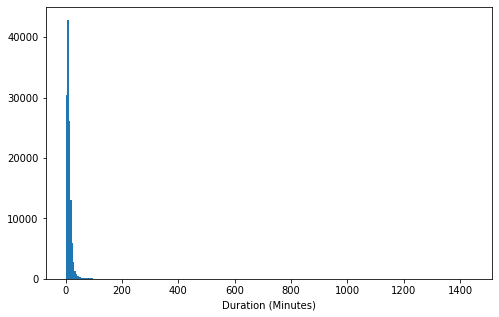

In [26]:
# start with a standard-scaled plot "histogram"
binsize = 5
bins = np.arange(1, df['duration_min'].max() + binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xlabel('Duration (Minutes)');

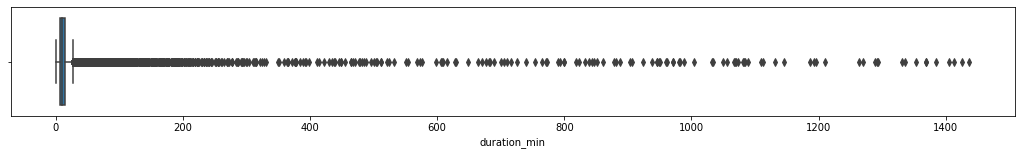

In [27]:
# another plot "box plot"
plt.figure(figsize = [18, 2])
sb.boxplot(data = df, x = 'duration_min');

> By these two plots, we notice that most of our data are less than 60 minutes!

In [28]:
df.query('duration_min >= 60')['duration_min'].count()

1228

In [29]:
df['duration_min'].describe()

count    125634.000000
mean         13.066784
std          30.470643
min           1.020000
25%           6.080000
50%           9.580000
75%          14.680000
max        1437.170000
Name: duration_min, dtype: float64

> Our data are not in a normal distribution, we have to put it on a log scale.

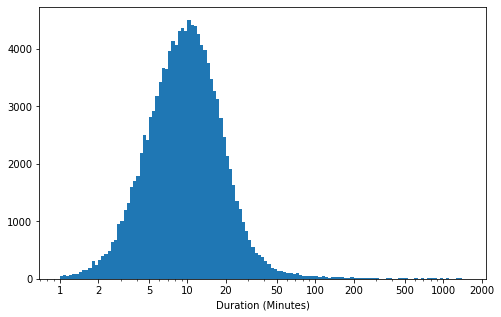

In [30]:
# put the data on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000])
plt.xlabel('Duration (Minutes)');

> By this plot, we have a normal distribution, but there is a clear tailed distribution from 50 minutes and above (right side).

We will calculate IQR to solve this and make the data better with an appropriate plot!

In [31]:
Q1 = df['duration_min'].quantile(0.25)
Q3 = df['duration_min'].quantile(0.75)
IQR = Q3 - Q1
Upper_Bound = Q3 + (1.5 * IQR) 
Upper_Bound

27.58

> Regardless of the result of IQR, logically we will suppose that any duration more than 60 minutes (1 Hour) is an outlier.

In [32]:
df = df.query('duration_min <= 60')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124407 entries, 6 to 149779
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             124407 non-null  int64         
 1   start_time               124407 non-null  datetime64[ns]
 2   end_time                 124407 non-null  datetime64[ns]
 3   start_station_id         124407 non-null  int32         
 4   start_station_name       124407 non-null  object        
 5   start_station_latitude   124407 non-null  float64       
 6   start_station_longitude  124407 non-null  float64       
 7   end_station_id           124407 non-null  int32         
 8   end_station_name         124407 non-null  object        
 9   end_station_latitude     124407 non-null  float64       
 10  end_station_longitude    124407 non-null  float64       
 11  bike_id                  124407 non-null  int64         
 12  user_type       

In [34]:
df['duration_min'].describe()

count    124407.000000
mean         11.364375
std           7.684539
min           1.020000
25%           6.070000
50%           9.520000
75%          14.480000
max          60.000000
Name: duration_min, dtype: float64

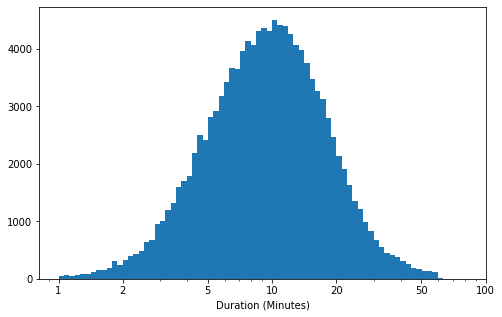

In [35]:
# check after remove outliers
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100])
plt.xlabel('Duration (Minutes)');

> Our distribution is normal now, after the outliers deleted and put it on a log scale.

Now, I will explore the stations.

In [36]:
#top50_start_stations = df['start_station_name'].value_counts().sort_values(ascending = False).head(50)

top50_start_stations = df['start_station_name'].value_counts().sort_values().tail(50)

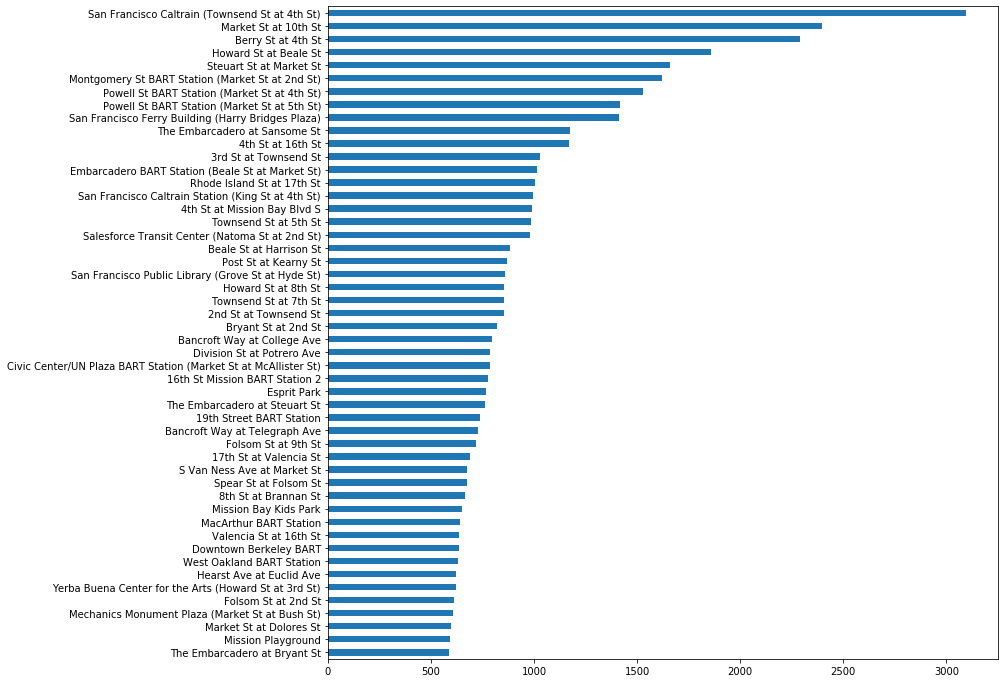

In [37]:
plt.figure(figsize=[12, 12])
top50_start_stations.plot(kind = 'barh');

> By this plot, we noticed that the **San Francisco Caltrain** station is the most station that bike riders start at (3094).

In [38]:
top50_end_stations = df['end_station_name'].value_counts().sort_values().tail(50)

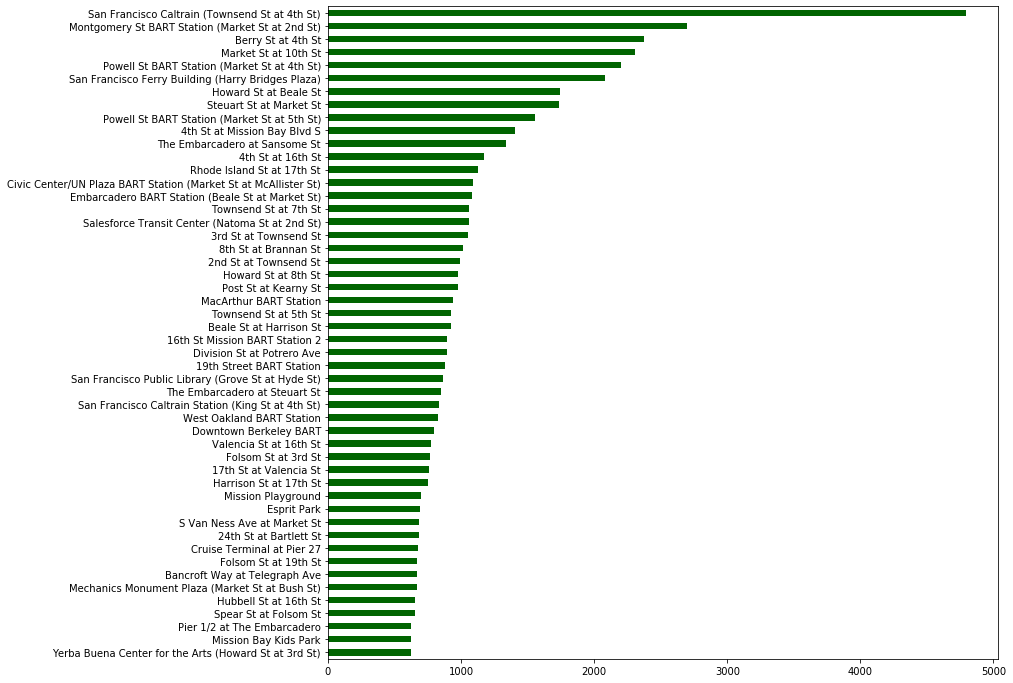

In [39]:
plt.figure(figsize=[12, 12])
top50_end_stations.plot(kind = 'barh', color = 'darkgreen');

> By this plot, we noticed that the **San Francisco Caltrain** station is the most station that bike riders end at (4791).

Now, I will explore the user types.

In [40]:
df['user_type'].value_counts()

Customer      67909
Subscriber    56498
Name: user_type, dtype: int64

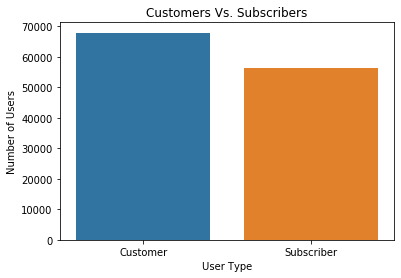

In [41]:
sb.countplot(data = df, x = 'user_type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Customers Vs. Subscribers');

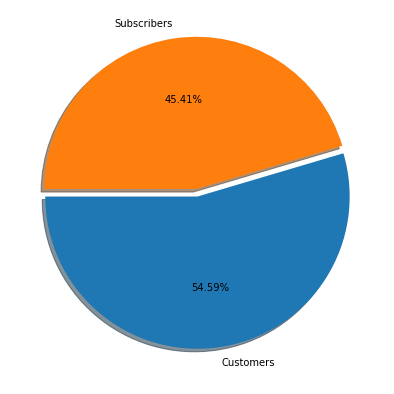

In [42]:
labels = 'Customers', 'Subscribers'
plt.figure(figsize=[7, 7])
plt.pie(df['user_type'].value_counts(), explode = (0, 0.05), labels = labels, autopct = '%1.2f%%', shadow = True, startangle = 180);

> By these two plots, we notice that the Customers are more than Subscribers. As the number of Customers is 67909 (**54.59%**) while the number of subscribers is 56498 (**45.41%**).

Now, I will explore the number of trips in (Day of Month, Day of Week, Hour of Day).

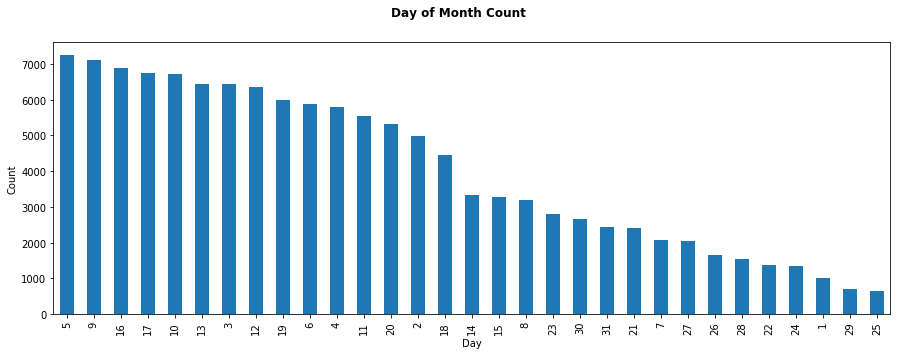

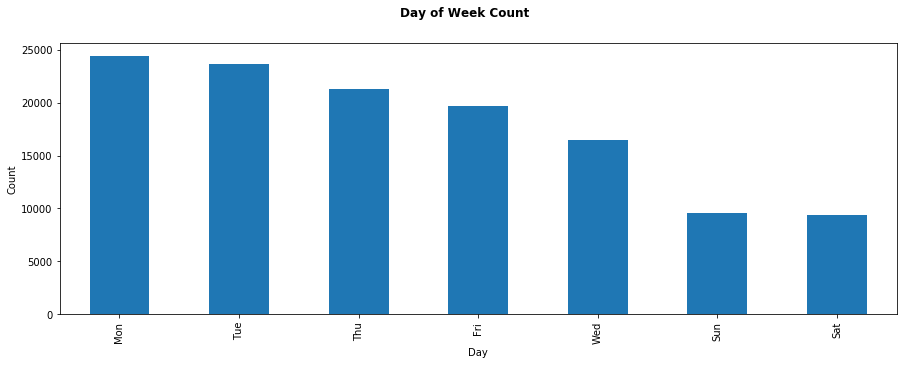

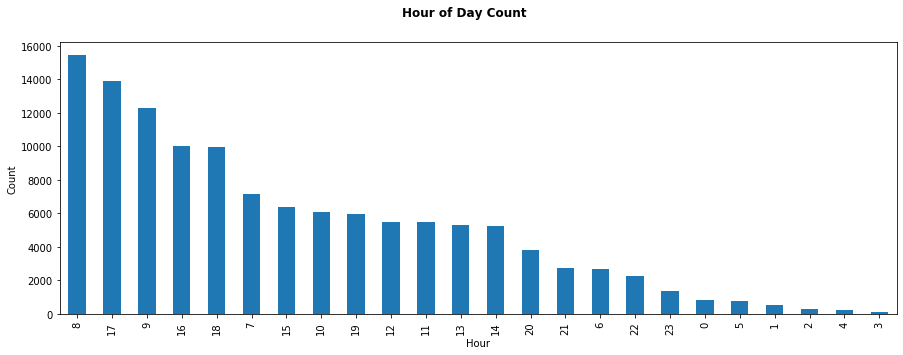

In [43]:
plt.figure(figsize=[15, 5])
df['day_of_month'].value_counts().plot(kind = 'bar')
plt.xlabel('Day')
plt.ylabel('Count')
plt.suptitle('Day of Month Count', fontsize = 12, fontweight = 'bold');

plt.figure(figsize=[15, 5])
df['day_of_week'].value_counts().plot(kind = 'bar')
plt.xlabel('Day')
plt.ylabel('Count')
plt.suptitle('Day of Week Count', fontsize = 12, fontweight = 'bold');

plt.figure(figsize=[15, 5])
df['hour_of_day'].value_counts().plot(kind = 'bar')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.suptitle('Hour of Day Count', fontsize = 12, fontweight = 'bold');

plt.show();

> By these three plots, we notice that most of the trips be on day 5&9 of the month, on Monday of the week, and most of them at 8 clock of the day.
- Most of the trips are active in the Q1 and Q2 of the month.
- Most of the trips are active on Mondays, Tuesdays and Thursdays, and less active in on Saturday and Sunday (Weekend).
- Most of the trips are active in the mornings and afternoons hours (usually work start/end times).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - Duration trips (in Minutes) has outliers with unusual time of usage.
- Most of users are Customers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the duration trips (in Munites), a number of outliers were identified and removed.

## Bivariate Exploration

I will start by looking to the relationshp between the duration (in minutes) and stations latitude/longitude.

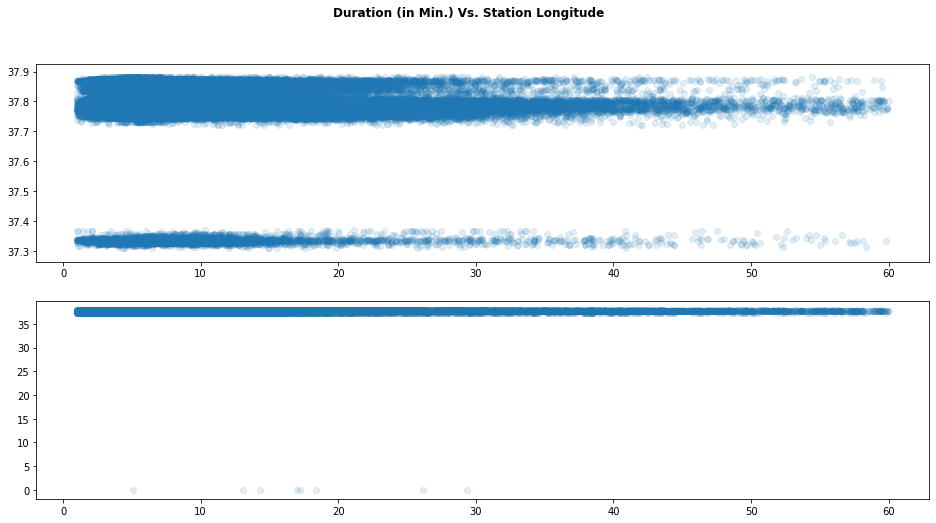

In [44]:
base_color = sb.color_palette()[0]

plt.figure(figsize=[16, 8])
plt.subplot(2, 1, 1)
plt.scatter(data = df, x = 'duration_min', y = 'start_station_latitude', color = base_color, alpha = 1/8)

plt.subplot(2, 1, 2)
plt.scatter(data = df, x = 'duration_min', y = 'end_station_latitude', color = base_color, alpha = 1/8)

plt.suptitle('Duration (in Min.) Vs. Station Longitude', fontsize = 12, fontweight = 'bold');
plt.show;

> We have outliers must be removed.

In [45]:
# Remove outliers
df.drop(df[df.start_station_latitude < 37.7].index, inplace = True)
df.drop(df[df.end_station_latitude < 37.7].index, inplace = True)

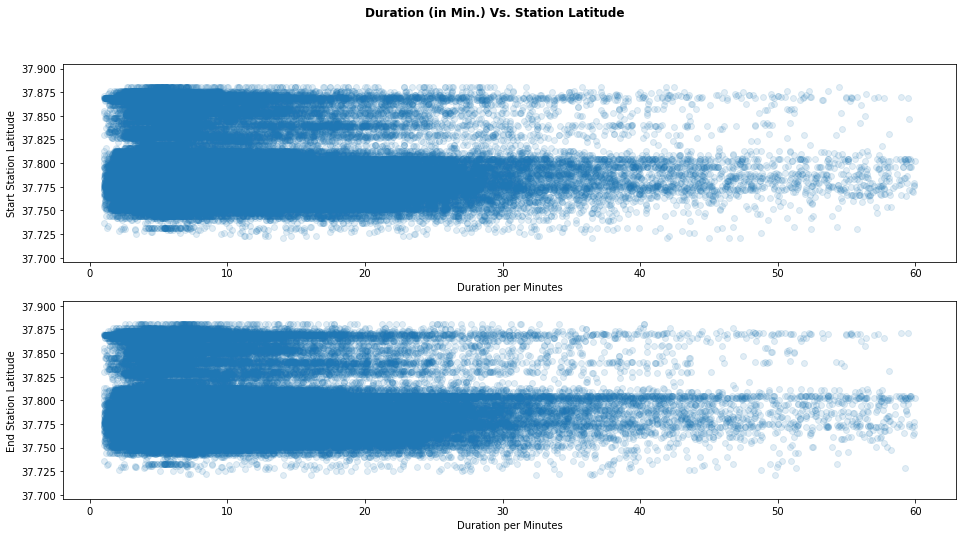

In [46]:
plt.figure(figsize=[16, 8])
plt.subplot(2, 1, 1)
plt.scatter(data = df, x = 'duration_min', y = 'start_station_latitude', color = base_color, alpha = 1/8)
plt.xlabel('Duration per Minutes')
plt.ylabel('Start Station Latitude')

plt.subplot(2, 1, 2)
plt.scatter(data = df, x = 'duration_min', y = 'end_station_latitude', color = base_color, alpha = 1/8)
plt.xlabel('Duration per Minutes')
plt.ylabel('End Station Latitude')

plt.suptitle('Duration (in Min.) Vs. Station Latitude', fontsize = 12, fontweight = 'bold');
plt.show;

> By these two plots, we noticed that the fastest way to finish the trip lies between 37.750 and 37.875

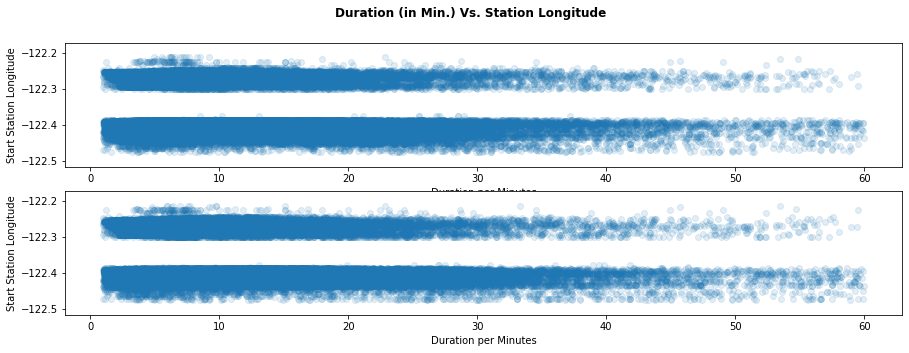

In [47]:
plt.figure(figsize=[15, 5])
plt.subplot(2, 1, 1)
plt.scatter(data = df, x = 'duration_min', y = 'start_station_longitude', color = base_color, alpha = 1/8)
plt.xlabel('Duration per Minutes')
plt.ylabel('Start Station Longitude')

plt.subplot(2, 1, 2)
plt.scatter(data = df, x = 'duration_min', y = 'end_station_longitude', color = base_color, alpha = 1/8)
plt.xlabel('Duration per Minutes')
plt.ylabel('Start Station Longitude')

plt.suptitle('Duration (in Min.) Vs. Station Longitude', fontsize = 12, fontweight = 'bold');
plt.show;

> By these two plots, we noticed that the fastest way to finish the trip lies between -122.2 and -122.5

C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\seaborn\categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


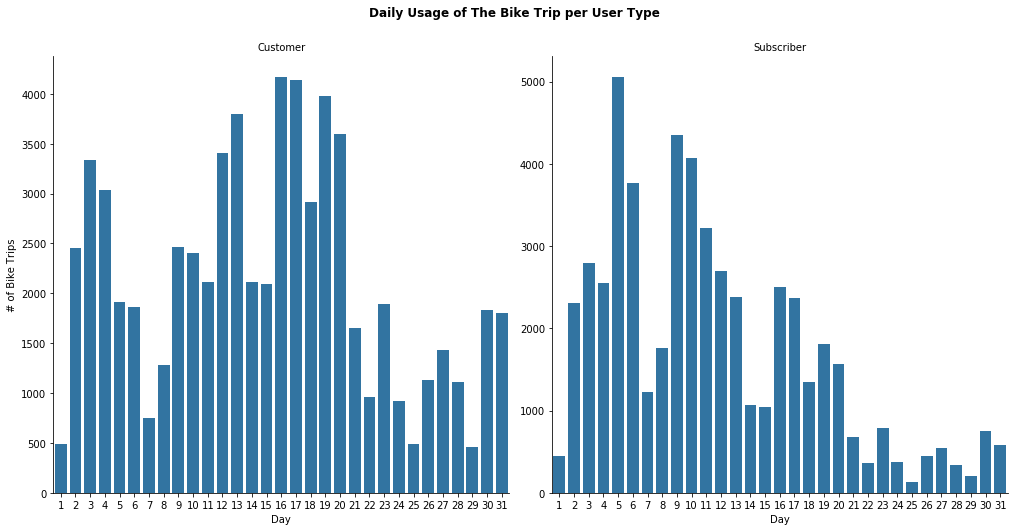

In [48]:
g = sb.catplot(data = df, x = 'day_of_month', col = "user_type", kind = 'count', sharey = False, color = base_color, size = 7);
g.set_titles("{col_name}")
g.set_axis_labels("Day", "# of Bike Trips")
g.fig.suptitle('Daily Usage of The Bike Trip per User Type', y = 1.05, fontsize = 12, fontweight = 'bold');

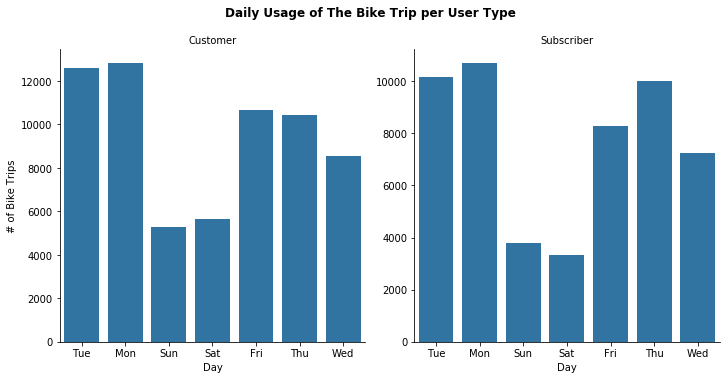

In [49]:
g = sb.catplot(data = df, x = 'day_of_week', col = "user_type", kind = 'count', sharey = False, color = base_color);
g.set_titles("{col_name}")
g.set_axis_labels("Day", "# of Bike Trips")
g.fig.suptitle('Daily Usage of The Bike Trip per User Type', y = 1.05, fontsize = 12, fontweight = 'bold');

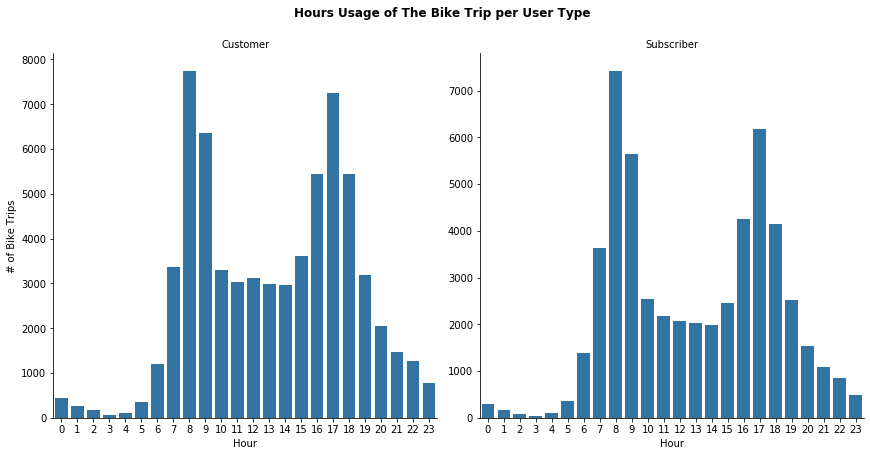

In [50]:
g = sb.catplot(data = df, x = 'hour_of_day', col = "user_type", kind = 'count', sharey = False, color = base_color, size = 6);
g.set_titles("{col_name}")
g.set_axis_labels("Hour", "# of Bike Trips")
g.fig.suptitle('Hours Usage of The Bike Trip per User Type', y = 1.05, fontsize = 12, fontweight = 'bold');

> By these plots, the customers and subscribers almost the same, except that the customer has clearly more trips from day 16 to day 20  and a few increase for the rest of the month compared with the subscribers.

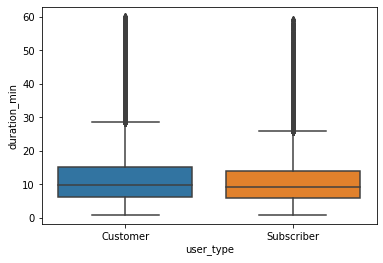

In [51]:
sb.boxplot(data = df, x = 'user_type', y = 'duration_min');

> It seems all user types are mostly the same, with a more duration trip by customers than the subscribers (subscribers finish the trip faster).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - There is a relationship between duration per minute and the start/end station latitude/longitude, while the latitude between 37.750 and 37.875 means the trip will be faster, as well as while the longitude between -122.2 and -122.5 means the trip will be faster.
- There is a relationship between duration per minutes and user type, while all user types (Customers & Subscribers) are mostly the same, but the subscribers finish the trip faster than the customers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - There is a relationship between the user types and day/month - day/week - hour/day, there are mostly the same, while the customer has more trips from day 16 to day 20 and a few more trips for the rest of the month compared with the subscribers.

## Multivariate Exploration

I will start by looking to the relationshp between the duration (in minutes), stations latitude/longitude and user types.

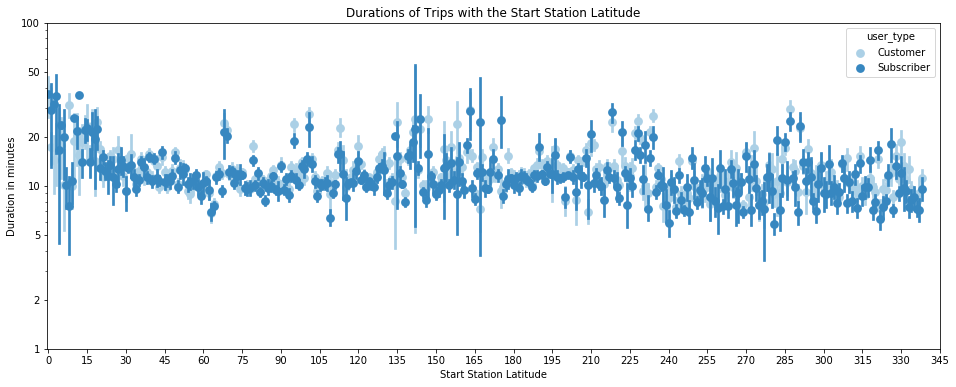

In [52]:
fig = plt.figure(figsize = [16,6]);
ax = sb.pointplot(data = df, x = 'start_station_latitude', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '');
plt.title('Durations of Trips with the Start Station Latitude')
plt.xlabel('Start Station Latitude')
plt.ylabel('Duration in minutes')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xticks([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345],
           [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345]);
ax.set_yticklabels([],minor = True);

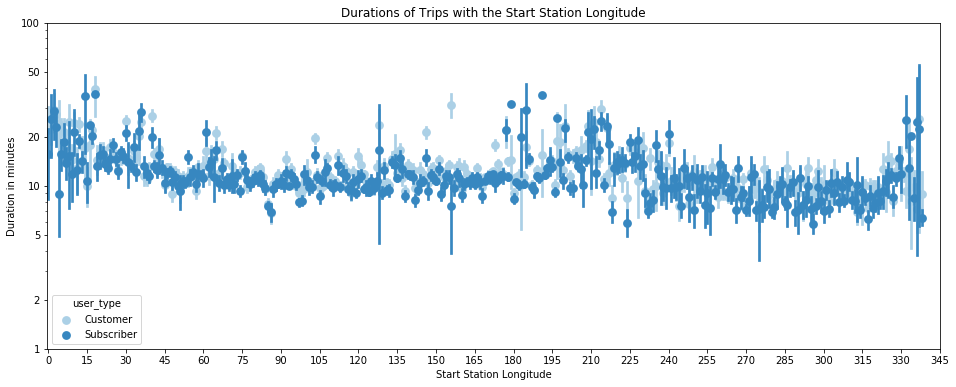

In [53]:
fig = plt.figure(figsize = [16,6]);
ax = sb.pointplot(data = df, x = 'start_station_longitude', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '');
plt.title('Durations of Trips with the Start Station Longitude')
plt.xlabel('Start Station Longitude')
plt.ylabel('Duration in minutes')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xticks([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345],
           [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345]);
ax.set_yticklabels([],minor = True);

> By these plots, despite the clear similarities between the user types, there is a slight change that indicates that subscribers take less time during the trip per minute.

C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ABDULRAHMAN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


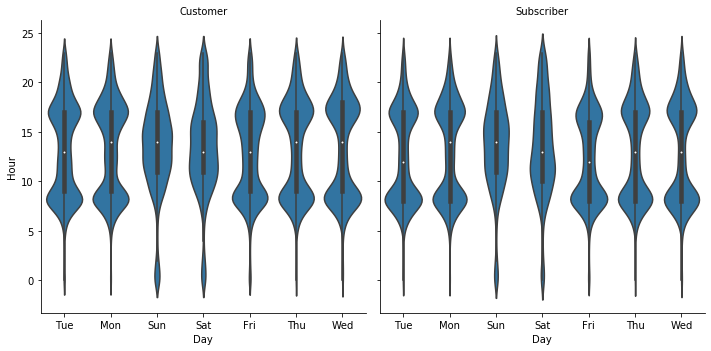

In [54]:
g1 = sb.FacetGrid(data = df, col = 'user_type', size = 5)
g1.map(sb.violinplot, 'day_of_week', 'hour_of_day');
g1.set_axis_labels("Day", "Hour")
g1.set_titles("{col_name}");

> By this plot, we note that on weekdays, trips are active in the morning periods (7,8,9) and evening periods (16,17) "Usually work start/end times" compared to the days of the weekend that indicates a different activity, usually the afternoon period. These notes are the same by subscribers and customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - There is a slight change that indicates that subscribers take less time during the trip per minute.
-  For all user types, the trips are active in the morning periods (7,8,9) and evening periods (16,17) "Usually work start/end times" compared to the days of the weekend that indicates a different activity, usually the afternoon period.

### Were there any interesting or surprising interactions between features?

> I noticed that the subscriber user type usually takes less distance (by latitude and longitude), and because of this, we saw why the subscribers have less duration trip compared with the customers.

In [55]:
# Store the new data in a CSV file
df.to_csv('201912-baywheels-tripdata_edited.csv', index = False)